# Introduction

This notebook will include experimental results on the REINFORCE agent specified in the RL book by Rich Sutton on the smart vacuum environment.

In [4]:
# import needed libs

%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import matplotlib.pyplot as plt

import datetime

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Some initializations

from envs import SmartVac
from agents import ReinforceAgent

max_episode_steps = 1000000
results_folder = 'res/'
figs_folder = 'figs/'

## REINFORCE agent 

In [33]:
AgentClass = ReinforceAgent

env = SmartVac()
num_of_tests = 10
episode_count = 10000
plot_count = int(episode_count / 100)

alpha = 0.01
params_str = f'alpha_{alpha}_episodes_{episode_count}'

agent_name = AgentClass.__name__

mult_avgs = []
mult_probs1 = []
mult_probs2 = []
for i_test in range(num_of_tests):
    print()
    print(i_test + 1, end=' ')
    
    # Initialize the agent
    agent = AgentClass(alpha=alpha)
    
    avgs = []
    probs1 = []
    probs2 = []
        
    episode_rewards = np.zeros(episode_count)
    for i_episode in range(episode_count):
        done = False
        totalReward = 0

        if i_episode >= plot_count and (i_episode % plot_count == 0):
            avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
            avgs.append(avg)

            # deterministic position
            env.x = 0
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs1.append(prob)

            # stochastic position
            env.x = 1
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs2.append(prob)

            print('#', end='', flush=True)
            if len(avgs) % 100 == 0:
                print(i_episode)

        obs = env.reset()
        action = agent.start(obs)

        step = 0
        while not done:
            obs, reward, done = env.step(action)
            action = agent.step(obs, reward, done)
            totalReward += reward

            step += 1
            if step > max_episode_steps:
                done = True

        episode_rewards[i_episode] = totalReward
        agent.update_for_episode()
        
    mult_avgs.append(avgs)
    mult_probs1.append(probs1)
    mult_probs2.append(probs2)
    
avgs = np.mean(np.array(mult_avgs), axis=0)
probs1 = np.mean(np.array(mult_probs1), axis=0)
probs2 = np.mean(np.array(mult_probs2), axis=0)


1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 ###################################################################################################
5 ###################################################################################################
6 ###################################################################################################
7 ###################################################################################################
8 ###################################################################################################
9 ###################################################################################################
10 ##############################################################################

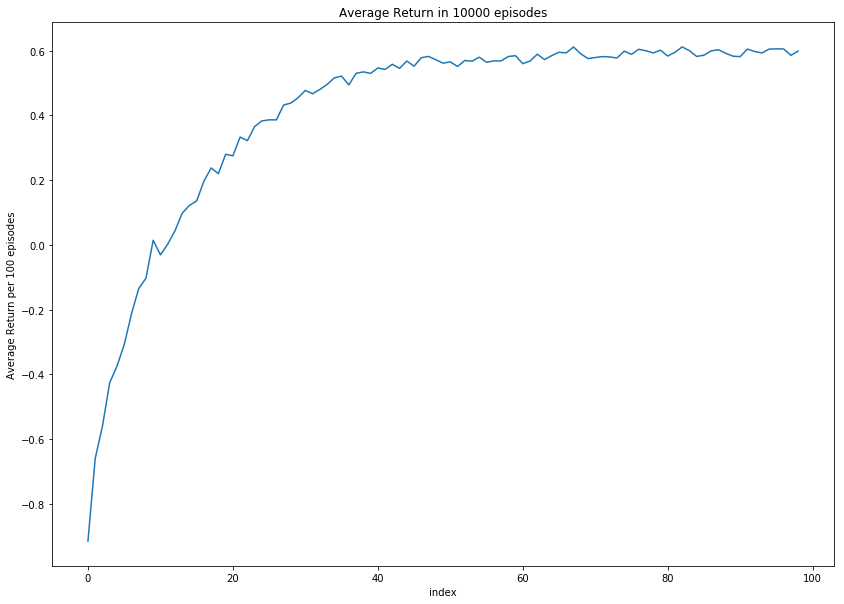

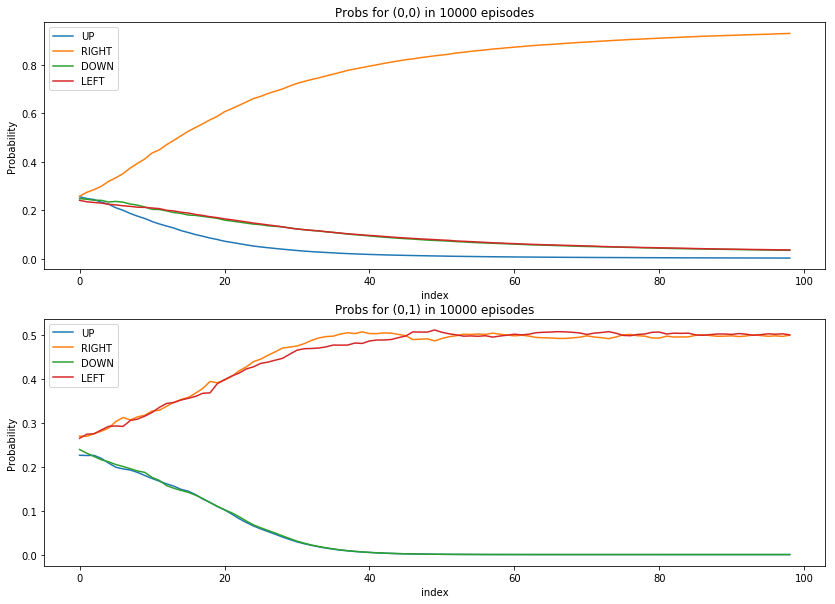


Average: 			0.412
Best 100 Average: 	0.612
Last 100 Average: 	0.599

Agent: ReinforceAgent 	Alpha: 0.01
x: 0, y:1, probs: [0.00,0.93,0.04,0.03]
x: 1, y:1, probs: [0.00,0.52,0.00,0.48]
x: 2, y:1, probs: [0.96,0.00,0.04,0.00]
x: 3, y:1, probs: [0.00,0.52,0.00,0.48]
x: 4, y:1, probs: [0.00,0.05,0.02,0.92]


In [34]:
plt.figure(1, figsize=(14,10))
plt.plot(avgs)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Average Return per {plot_count} episodes')
# plt.savefig(f'{figs_folder}agent_{agent_name}_{params_str}.png')
plt.show()

plt.figure(2, figsize=(14,10))
plt.subplot(211)
plt.plot(probs1)
plt.title(f'Probs for (0,0) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])

plt.subplot(212)
plt.plot(probs2)
plt.title(f'Probs for (0,1) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])
plt.show()

print('')

results = f'Average: \t\t\t{np.mean(avgs):5.3f}'
results += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
results += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'

# print(agent.theta)
results += f'\n\nAgent: {agent_name} \tAlpha: {alpha}'

test_xs = [0, 1, 2, 3, 4]
test_ys = [1, 1, 1, 1, 1]
for i in range(len(test_xs)):
    env.x = test_xs[i]
    env.y = test_ys[i]
    obs = env.get_obs()
    probs = agent.get_action_vals_for_obs(obs)
    results += f'\nx: {env.x}, y:{env.y}, probs: [{probs[0]:4.2f},{probs[1]:4.2f},{probs[2]:4.2f},{probs[3]:4.2f}]'

print(results)
# Write to file if needed
# file = open(f'{results_folder}agent_{agent_name}_{params_str}.txt', 'w')
# file.write(results)
# file.close()

## Reinforce with other reward values

In [ ]:
AgentClass = ReinforceAgent

env = SmartVac(terminal_rewards=(-1,-3))
num_of_tests = 1
episode_count = 1000000
plot_count = int(episode_count / 100)

alpha = np.power(2.0, -13)
params_str = f'alpha_{alpha}_episodes_{episode_count}'

agent_name = AgentClass.__name__

mult_avgs = []
mult_probs1 = []
mult_probs2 = []
for i_test in range(num_of_tests):
    print()
    print(i_test + 1, end=' ')
    
    # Initialize the agent
    agent = AgentClass(alpha=alpha, precision_class=np.float64)
    
    avgs = []
    probs1 = []
    probs2 = []
        
    episode_rewards = np.zeros(episode_count)
    for i_episode in range(episode_count):
        done = False
        totalReward = 0

        if i_episode >= plot_count and (i_episode % plot_count == 0):
            avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
            avgs.append(avg)

            # deterministic position
            env.x = 0
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs1.append(prob)

            # stochastic position
            env.x = 1
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs2.append(prob)

            print('#', end='', flush=True)
            if len(avgs) % 100 == 0:
                print(i_episode)

        obs = env.reset()
        action = agent.start(obs)

        step = 0
        while not done:
            obs, reward, done = env.step(action)
            action = agent.step(obs, reward, done)
            totalReward += reward

            step += 1
            if step > max_episode_steps:
                done = True

        episode_rewards[i_episode] = totalReward
        agent.update_for_episode()
        
    mult_avgs.append(avgs)
    mult_probs1.append(probs1)
    mult_probs2.append(probs2)
    
avgs = np.mean(np.array(mult_avgs), axis=0)
probs1 = np.mean(np.array(mult_probs1), axis=0)
probs2 = np.mean(np.array(mult_probs2), axis=0)


1 ####################################################################

In [ ]:
plt.figure(1, figsize=(14,10))
plt.plot(avgs)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Average Return per {plot_count} episodes')
# plt.savefig(f'{figs_folder}agent_{agent_name}_{params_str}.png')
plt.show()

plt.figure(2, figsize=(14,10))
plt.subplot(211)
plt.plot(probs1)
plt.title(f'Probs for (0,0) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])

plt.subplot(212)
plt.plot(probs2)
plt.title(f'Probs for (0,1) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])
plt.show()

print('')

results = f'Average: \t\t\t{np.mean(avgs):5.3f}'
results += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
results += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'

# print(agent.theta)
results += f'\n\nAgent: {agent_name} \tAlpha: {alpha}'

test_xs = [0, 1, 2, 3, 4]
test_ys = [1, 1, 1, 1, 1]
for i in range(len(test_xs)):
    env.x = test_xs[i]
    env.y = test_ys[i]
    obs = env.get_obs()
    probs = agent.get_action_vals_for_obs(obs)
    results += f'\nx: {env.x}, y:{env.y}, probs: [{probs[0]:4.2f},{probs[1]:4.2f},{probs[2]:4.2f},{probs[3]:4.2f}]'

print(results)
# Write to file if needed
# file = open(f'{results_folder}agent_{agent_name}_{params_str}.txt', 'w')
# file.write(results)
# file.close()